In [94]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# PARTE 1: Análisis de tendencias laborales

In [95]:
df_job_posting = pd.read_csv('D:\Python\Proyectos Personales\maps\job_postings.csv')

# Tratamiento de datos

In [96]:
df_job_posting.head(5)

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.00,NaN,MONTHLY,Full-time,"Little River, SC",...,NaN,Entry level,NaN,1.699090e+12,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY,1699138101
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",...,NaN,NaN,NaN,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085420
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",...,NaN,NaN,Bachelor's Degree in Mechanical Engineering pr...,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085644
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",...,NaN,Entry level,NaN,1.699080e+12,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,1699087461
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.0,NaN,205956.0,YEARLY,Full-time,United States,...,NaN,Mid-Senior level,NaN,1.699090e+12,careers.iherb.com,0,FULL_TIME,USD,BASE_SALARY,1699085346


In [97]:
df_job_posting.shape

(33246, 28)

In [98]:
df_job_posting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      33246 non-null  int64  
 1   company_id                  32592 non-null  float64
 2   title                       33246 non-null  object 
 3   description                 33245 non-null  object 
 4   max_salary                  11111 non-null  float64
 5   med_salary                  2241 non-null   float64
 6   min_salary                  11111 non-null  float64
 7   pay_period                  13352 non-null  object 
 8   formatted_work_type         33246 non-null  object 
 9   location                    33246 non-null  object 
 10  applies                     16238 non-null  float64
 11  original_listed_time        33246 non-null  float64
 12  remote_allowed              4802 non-null   float64
 13  views                       258

# Verificacion de valores nulos

In [99]:
df_job_posting.isnull().sum()

job_id                            0
company_id                      654
title                             0
description                       1
max_salary                    22135
med_salary                    31005
min_salary                    22135
pay_period                    19894
formatted_work_type               0
location                          0
applies                       17008
original_listed_time              0
remote_allowed                28444
views                          7360
job_posting_url                   0
application_url               12250
application_type                  0
expiry                            0
closed_time                   32074
formatted_experience_level     9181
skills_desc                   32909
listed_time                       0
posting_domain                13558
sponsored                         0
work_type                         0
currency                      19894
compensation_type             19894
scraped                     

In [100]:
df_job_posting.describe()

,job_id,company_id,max_salary,med_salary,min_salary,applies,original_listed_time,remote_allowed,views,expiry,closed_time,listed_time,sponsored,scraped
count,3.324600e+04,3.259200e+04,1.111100e+04,2241.000000,11111.000000,16238.000000,3.324600e+04,4802.0,25886.000000,3.324600e+04,1.172000e+03,3.324600e+04,33246.000000,3.324600e+04
mean,3.723675e+09,1.145638e+07,8.880883e+04,32426.170598,62650.128421,18.895246,1.695907e+12,1.0,58.339875,1.699525e+12,1.692082e+12,1.696043e+12,0.244150,8.872011e+08
std,9.264310e+07,2.391219e+07,8.764506e+04,76860.422528,58732.644143,49.059029,3.163863e+09,0.0,141.253774,4.421979e+09,4.061876e+09,3.134178e+09,0.429588,8.487133e+08
min,3.958427e+06,1.009000e+03,1.000000e+01,0.000000,7.250000,1.000000,1.686210e+12,1.0,1.000000,1.694270e+12,1.690000e+12,1.691670e+12,0.000000,1.000000e+00
25%,3.697367e+09,1.840100e+04,5.100000e+01,18.780000,40.945000,2.000000,1.692740e+12,1.0,4.000000,1.695340e+12,1.690000e+12,1.692750e+12,0.000000,1.000000e+00
50%,3.749345e+09,4.687820e+05,8.392800e+04,29.000000,62128.000000,5.000000,1.696910e+12,1.0,16.000000,1.701630e+12,1.690000e+12,1.698960e+12,0.000000,1.698996e+09
75%,3.756905e+09,9.222480e+06,1.400000e+05,42746.000000,100000.000000,16.000000,1.699040e+12,1.0,54.000000,1.701640e+12,1.690000e+12,1.699050e+12,0.000000,1.699065e+09
max,3.757940e+09,1.011741e+08,1.300000e+06,998426.000000,800000.000000,1615.000000,1.699090e+12,1.0,5656.000000,1.714680e+12,1.700000e+12,1.699140e+12,1.000000,1.699140e+09


# Imputar valores nulos por la mediana(numericos) o la moda(categoricos)

In [101]:
# Obtener una lista de columnas con valores nulos
columns_with_nulls = df_job_posting.columns[df_job_posting.isnull().any()].tolist()

# Imputar valores nulos por la mediana o la moda
for column in columns_with_nulls:
    if df_job_posting[column].dtype == 'object':
        # Imputar valores categóricos con la moda
        mode_value = df_job_posting[column].mode()[0]
        df_job_posting[column].fillna(mode_value, inplace=True)
    else:
        # Imputar valores numéricos con la mediana
        median_value = df_job_posting[column].median()
        df_job_posting[column].fillna(median_value, inplace=True)

# Verificar que no haya más valores nulos
print(df_job_posting.isnull().sum())

job_id                        0
company_id                    0
title                         0
description                   0
max_salary                    0
med_salary                    0
min_salary                    0
pay_period                    0
formatted_work_type           0
location                      0
applies                       0
original_listed_time          0
remote_allowed                0
views                         0
job_posting_url               0
application_url               0
application_type              0
expiry                        0
closed_time                   0
formatted_experience_level    0
skills_desc                   0
listed_time                   0
posting_domain                0
sponsored                     0
work_type                     0
currency                      0
compensation_type             0
scraped                       0
dtype: int64


In [102]:
df_job_posting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      33246 non-null  int64  
 1   company_id                  33246 non-null  float64
 2   title                       33246 non-null  object 
 3   description                 33246 non-null  object 
 4   max_salary                  33246 non-null  float64
 5   med_salary                  33246 non-null  float64
 6   min_salary                  33246 non-null  float64
 7   pay_period                  33246 non-null  object 
 8   formatted_work_type         33246 non-null  object 
 9   location                    33246 non-null  object 
 10  applies                     33246 non-null  float64
 11  original_listed_time        33246 non-null  float64
 12  remote_allowed              33246 non-null  float64
 13  views                       332

In [103]:
df_job_posting.head()

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,83928.0,5250.00,62128.0,MONTHLY,Full-time,"Little River, SC",...,1.690000e+12,Entry level,ER Emergency Room,1.699090e+12,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY,1699138101
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,83928.0,29.00,62128.0,YEARLY,Full-time,"Beaver Dam, WI",...,1.690000e+12,Mid-Senior level,ER Emergency Room,1.699080e+12,www.click2apply.net,0,FULL_TIME,USD,BASE_SALARY,1699085420
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,83928.0,29.00,62128.0,YEARLY,Full-time,"Bessemer, AL",...,1.690000e+12,Mid-Senior level,Bachelor's Degree in Mechanical Engineering pr...,1.699080e+12,www.click2apply.net,0,FULL_TIME,USD,BASE_SALARY,1699085644
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,83928.0,22.27,62128.0,HOURLY,Full-time,"Aliso Viejo, CA",...,1.690000e+12,Entry level,ER Emergency Room,1.699080e+12,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,1699087461
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.0,29.00,205956.0,YEARLY,Full-time,United States,...,1.690000e+12,Mid-Senior level,ER Emergency Room,1.699090e+12,careers.iherb.com,0,FULL_TIME,USD,BASE_SALARY,1699085346


In [104]:
df_job_posting.describe()

,job_id,company_id,max_salary,med_salary,min_salary,applies,original_listed_time,remote_allowed,views,expiry,closed_time,listed_time,sponsored,scraped
count,3.324600e+04,3.324600e+04,3.324600e+04,33246.000000,33246.000000,33246.000000,3.324600e+04,33246.0,33246.000000,3.324600e+04,3.324600e+04,3.324600e+04,33246.000000,3.324600e+04
mean,3.723675e+09,1.124024e+07,8.555920e+04,2212.783292,62302.498252,11.786711,1.695907e+12,1.0,48.966673,1.699525e+12,1.690073e+12,1.696043e+12,0.244150,8.872011e+08
std,9.264310e+07,2.372494e+07,5.071883e+04,21541.168308,33953.522807,34.981863,3.163863e+09,0.0,125.874522,4.421979e+09,8.535563e+08,3.134178e+09,0.429588,8.487133e+08
min,3.958427e+06,1.009000e+03,1.000000e+01,0.000000,7.250000,1.000000,1.686210e+12,1.0,1.000000,1.694270e+12,1.690000e+12,1.691670e+12,0.000000,1.000000e+00
25%,3.697367e+09,1.953400e+04,8.392800e+04,29.000000,62128.000000,5.000000,1.692740e+12,1.0,6.000000,1.695340e+12,1.690000e+12,1.692750e+12,0.000000,1.000000e+00
50%,3.749345e+09,4.687820e+05,8.392800e+04,29.000000,62128.000000,5.000000,1.696910e+12,1.0,16.000000,1.701630e+12,1.690000e+12,1.698960e+12,0.000000,1.698996e+09
75%,3.756905e+09,7.942352e+06,8.392800e+04,29.000000,62128.000000,5.000000,1.699040e+12,1.0,38.000000,1.701640e+12,1.690000e+12,1.699050e+12,0.000000,1.699065e+09
max,3.757940e+09,1.011741e+08,1.300000e+06,998426.000000,800000.000000,1615.000000,1.699090e+12,1.0,5656.000000,1.714680e+12,1.700000e+12,1.699140e+12,1.000000,1.699140e+09


# Verificamos valores atipicos

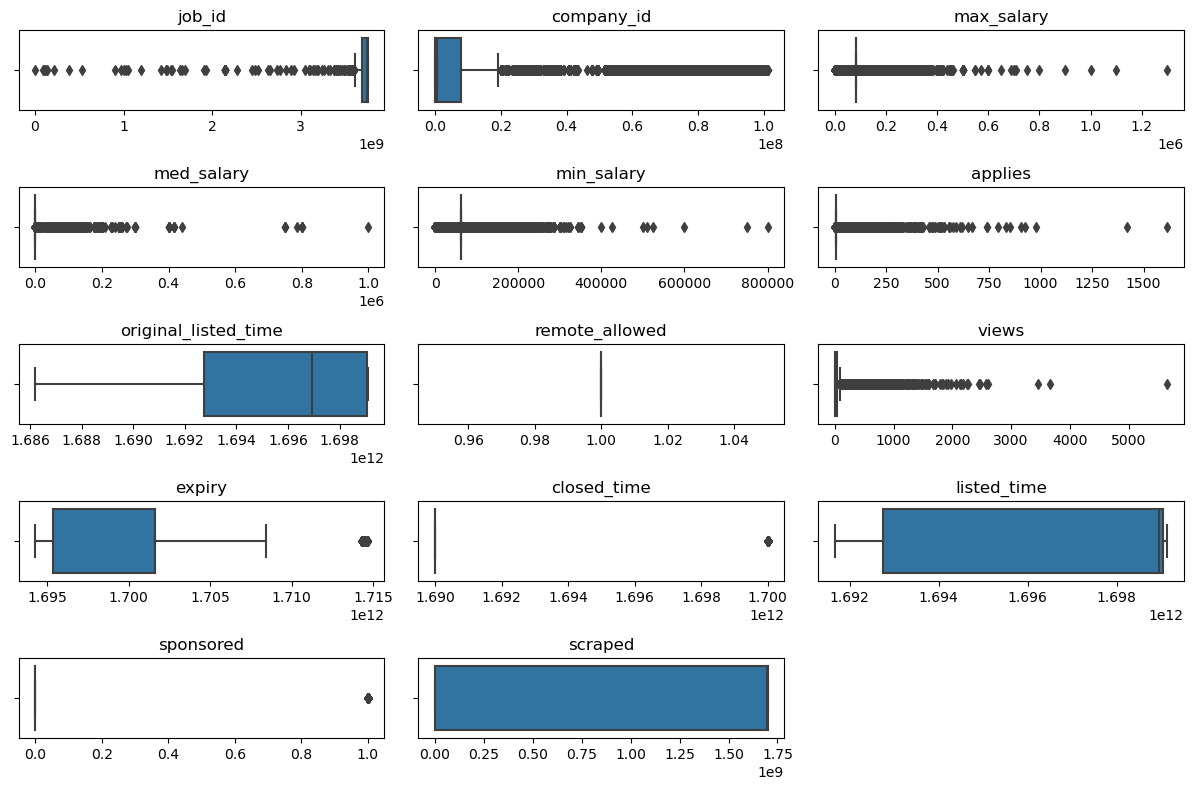

In [105]:
# Obtener una lista de columnas numéricas
numeric_columns = df_job_posting.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Crear boxplots para cada columna numérica
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i + 1)
    sns.boxplot(x=df_job_posting[column])
    plt.title(column)
    plt.xlabel('')
plt.tight_layout()
plt.show()

# Data Visualization


## 1.0   Análisis de la demanda de empleo por ubicación.

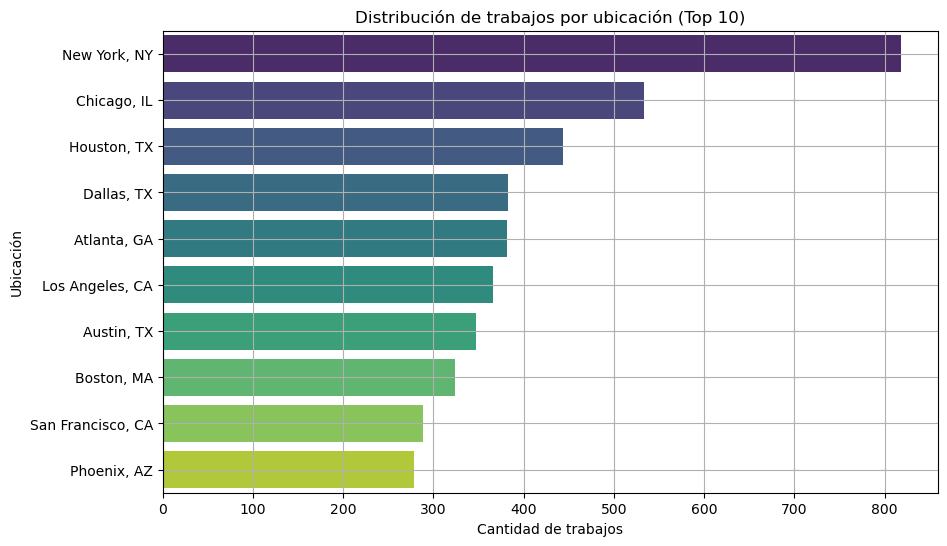

In [106]:
location_counts = df_job_posting[df_job_posting['location'] != 'United States']['location'].value_counts().head(10)

# Visualizar la distribución de trabajos por ubicación (excluyendo "United States")
plt.figure(figsize=(10, 6))
sns.barplot(x=location_counts.values, y=location_counts.index, palette='viridis')
plt.title('Distribución de trabajos por ubicación (Top 10)')
plt.xlabel('Cantidad de trabajos')
plt.ylabel('Ubicación')
plt.grid(True)
plt.show()

# Distribución de trabajos por título

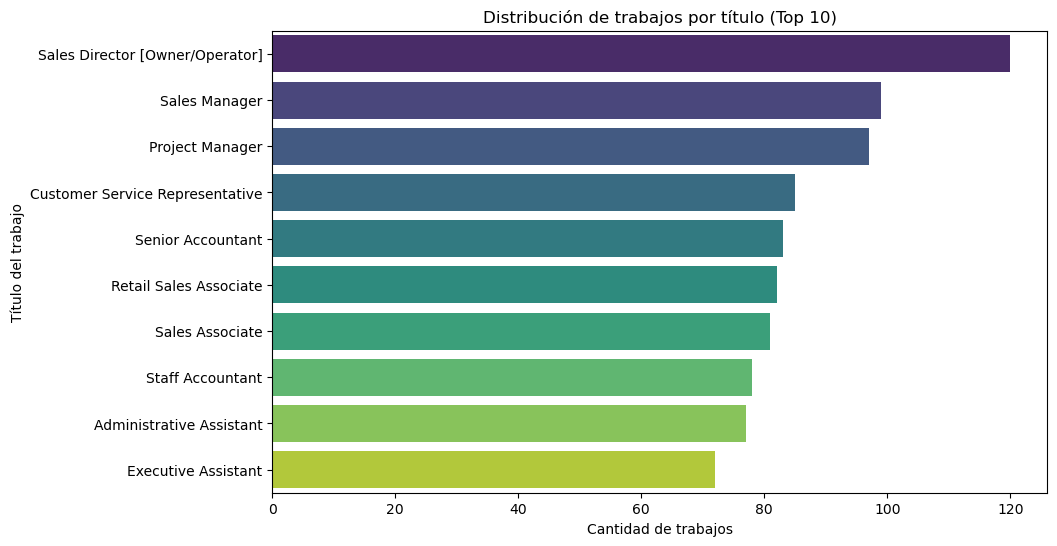

In [107]:
title_counts = df_job_posting['title'].value_counts().sort_values(ascending=False).head(10)

# Visualizar la distribución de trabajos por título
plt.figure(figsize=(10, 6))
sns.barplot(x=title_counts.values, y=title_counts.index, palette='viridis')
plt.title('Distribución de trabajos por título (Top 10)')
plt.xlabel('Cantidad de trabajos')
plt.ylabel('Título del trabajo')
plt.show()

# Títulos de trabajo con los salarios más altos

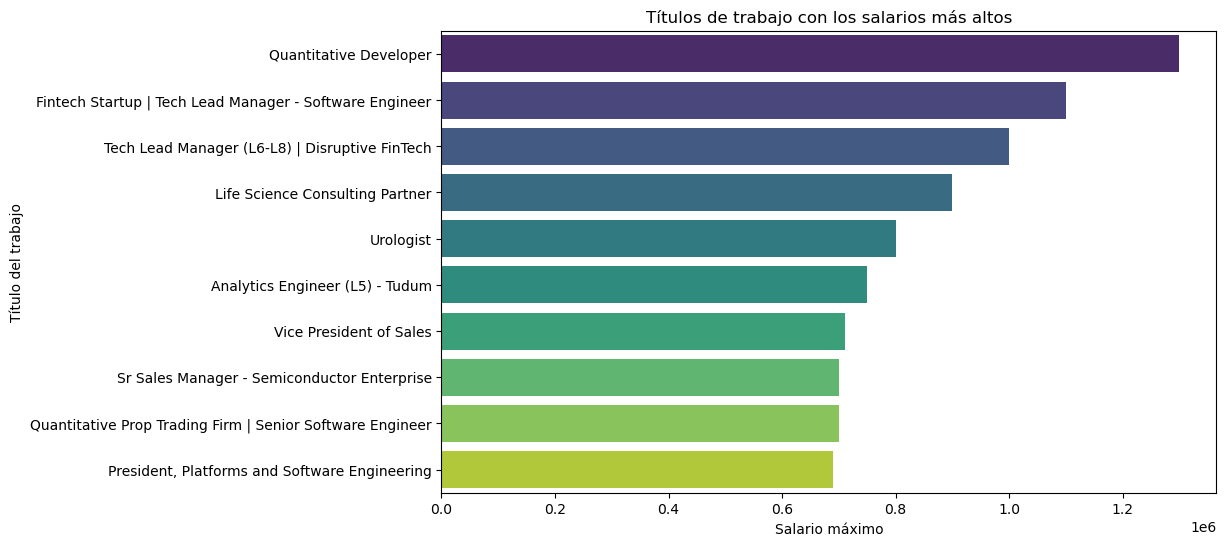

In [108]:
# Calcular las estadísticas resumidas de los salarios ofrecidos por título del trabajo
salary_stats_by_title = df_job_posting.groupby('title').agg({'max_salary': 'max', 'med_salary': 'median', 'min_salary': 'min'})

# Ordenar los títulos de trabajo por salario máximo en orden descendente
salary_stats_by_title = salary_stats_by_title.sort_values(by='max_salary', ascending=False).head(10)

# Visualizar los títulos de trabajo con los salarios más altos
plt.figure(figsize=(10, 6))
sns.barplot(x=salary_stats_by_title['max_salary'], y=salary_stats_by_title.index, palette='viridis')
plt.title('Títulos de trabajo con los salarios más altos')
plt.xlabel('Salario máximo')
plt.ylabel('Título del trabajo')
plt.show()

# Empresas más populares por cantidad total de aplicaciones y vistas

<Figure size 1000x600 with 0 Axes>

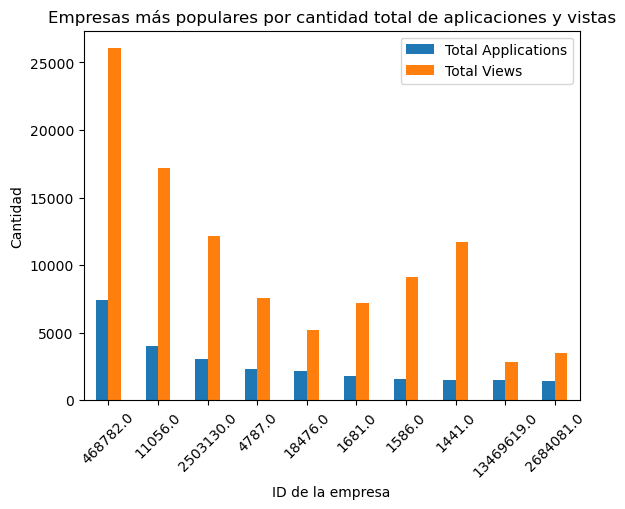

In [109]:
# Calcular la cantidad total de aplicaciones por empresa
applications_by_company = df_job_posting.groupby('company_id')['applies'].sum()

# Calcular el número total de vistas por empresa
views_by_company = df_job_posting.groupby('company_id')['views'].sum()

# Combinar las métricas de aplicaciones y vistas en un nuevo DataFrame
company_popularity = pd.DataFrame({'Total Applications': applications_by_company, 'Total Views': views_by_company})

# Ordenar las empresas por la cantidad total de aplicaciones en orden descendente
company_popularity = company_popularity.sort_values(by='Total Applications', ascending=False).head(10)

# Visualizar las empresas más populares
plt.figure(figsize=(10, 6))
company_popularity.plot(kind='bar', stacked=False)
plt.title('Empresas más populares por cantidad total de aplicaciones y vistas')
plt.xlabel('ID de la empresa')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

# PARTE 2: Análisis de beneficios laborales

In [110]:
df_benefits = pd.read_csv('D:\Python\Proyectos Personales\maps\Benefits.csv')

In [111]:
df_benefits.head()

,job_id,inferred,type
0,3690843087,0,Medical insurance
1,3690843087,0,Dental insurance
2,3690843087,0,401(k)
3,3690843087,0,Paid maternity leave
4,3690843087,0,Disability insurance


In [112]:
df_benefits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29325 entries, 0 to 29324
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   job_id    29325 non-null  int64 
 1   inferred  29325 non-null  int64 
 2   type      29325 non-null  object
dtypes: int64(2), object(1)
memory usage: 687.4+ KB


In [113]:
df_benefits.describe()

,job_id,inferred
count,2.932500e+04,29325.000000
mean,3.722919e+09,0.462950
std,1.008851e+08,0.498634
min,3.958427e+06,0.000000
25%,3.697339e+09,0.000000
50%,3.749346e+09,0.000000
75%,3.757315e+09,1.000000
max,3.757940e+09,1.000000


### Explorar los tipos de beneficios disponibles en el conjunto de datos.

In [114]:
# Mostrar los tipos de beneficios y su frecuencia de ocurrencia
benefits_counts = df_benefits['type'].value_counts()
print(benefits_counts)


401(k)                     9483
Medical insurance          4395
Vision insurance           4323
Dental insurance           3500
Disability insurance       2961
Tuition assistance         1184
Paid maternity leave        931
Paid paternity leave        864
Commuter benefits           837
Pension plan                518
Student loan assistance     165
Child care support          164
Name: type, dtype: int64


### Identificar los beneficios más comunes y su frecuencia de ocurrencia.

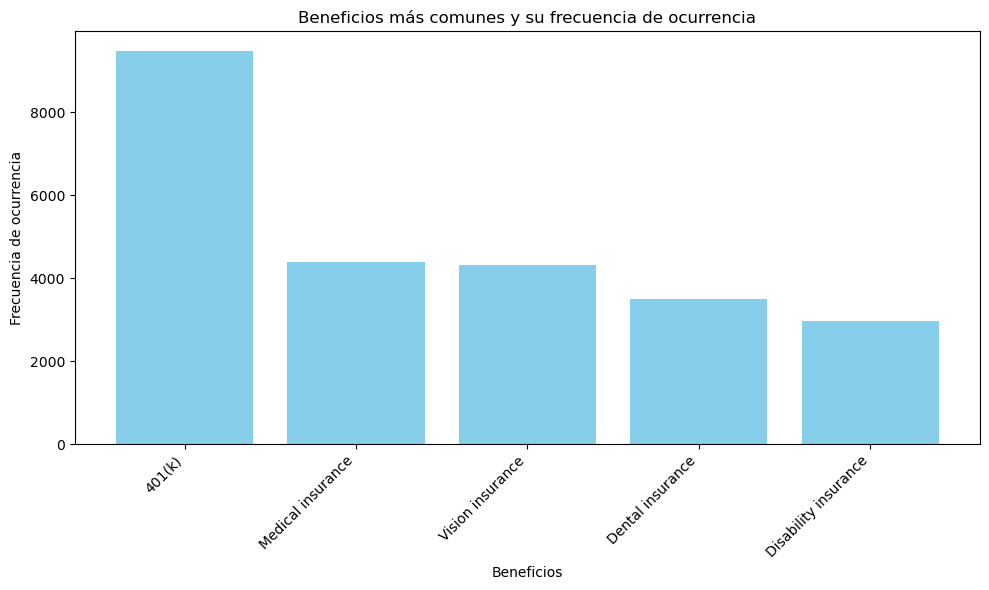

In [115]:
# Beneficios y su frecuencia de ocurrencia
benefits = ['401(k)', 'Medical insurance', 'Vision insurance', 'Dental insurance', 'Disability insurance']
frequency = [9483, 4395, 4323, 3500, 2961]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(benefits, frequency, color='skyblue')
plt.xlabel('Beneficios')
plt.ylabel('Frecuencia de ocurrencia')
plt.title('Beneficios más comunes y su frecuencia de ocurrencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# PARTE 3: Perfilado de empresas

In [116]:
df_companies = pd.read_csv('D:\Python\Proyectos Personales\company_details\companies.csv')
df_employee_counts = pd.read_csv('D:\Python\Proyectos Personales\company_details\employee_counts.csv')

In [117]:
df_companies.head()

,company_id,name,description,company_size,state,country,city,zip_code,address,url
0,1009,IBM,"At IBM, we do more than work. We create. We cr...",7.0,NY,US,"Armonk, New York",10504,International Business Machines Corp.,https://www.linkedin.com/company/ibm
1,1016,GE HealthCare,Every day millions of people feel the impact o...,7.0,0,US,Chicago,0,-,https://www.linkedin.com/company/gehealthcare
2,1021,GE Power,"GE Power, part of GE Vernova, is a world energ...",7.0,NY,US,Schenectady,12345,1 River Road,https://www.linkedin.com/company/gepower
3,1025,Hewlett Packard Enterprise,Official LinkedIn of Hewlett Packard Enterpris...,7.0,Texas,US,Houston,77389,1701 E Mossy Oaks Rd Spring,https://www.linkedin.com/company/hewlett-packa...
4,1028,Oracle,We’re a cloud technology company that provides...,7.0,Texas,US,Austin,78741,2300 Oracle Way,https://www.linkedin.com/company/oracle


In [118]:
df_employee_counts.head()

,company_id,employee_count,follower_count,time_recorded
0,81149246,6,91,1.692645e+09
1,10033339,3,187,1.692645e+09
2,6049228,20,82,1.692645e+09
3,2641066,45,2336,1.692645e+09
4,96649998,0,2,1.692645e+09


In [119]:
df_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11361 entries, 0 to 11360
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_id    11361 non-null  int64  
 1   name          11360 non-null  object 
 2   description   11218 non-null  object 
 3   company_size  10256 non-null  float64
 4   state         11353 non-null  object 
 5   country       11361 non-null  object 
 6   city          11360 non-null  object 
 7   zip_code      11349 non-null  object 
 8   address       11350 non-null  object 
 9   url           11361 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 887.7+ KB


In [120]:
df_companies.dropna(inplace=True)
df_companies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10159 entries, 0 to 11360
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_id    10159 non-null  int64  
 1   name          10159 non-null  object 
 2   description   10159 non-null  object 
 3   company_size  10159 non-null  float64
 4   state         10159 non-null  object 
 5   country       10159 non-null  object 
 6   city          10159 non-null  object 
 7   zip_code      10159 non-null  object 
 8   address       10159 non-null  object 
 9   url           10159 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 873.0+ KB


In [121]:
df_employee_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14275 entries, 0 to 14274
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company_id      14275 non-null  int64  
 1   employee_count  14275 non-null  int64  
 2   follower_count  14275 non-null  int64  
 3   time_recorded   14275 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 446.2 KB


In [122]:
# Agrupar las empresas por país y contar el número de empresas en cada país
companies_by_country = df_companies.groupby('country').size()

# Mostrar el resultado
print(companies_by_country)

country
0      152
AE       4
AT       5
AU      30
AZ       1
BE       9
BM       5
BR       1
CA     133
CH      54
CN      20
CO       1
CZ       1
DE      56
DK      15
EE       1
ES      16
FI      12
FR      55
GB     208
GE       1
HK       4
HU       1
ID       2
IE      14
IL       8
IN      61
IS       2
IT      13
JP      18
KE       1
KR       4
KY       1
LI       1
LU       2
MD       1
MT       1
MX       3
NL      31
NO       4
NZ       1
OO       8
PH       1
PR       1
RU       1
SA       2
SE      22
SG       9
TR       1
TW       5
US    9154
UY       1
VG       1
dtype: int64


In [123]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Verificar la longitud de los datos
print("Longitud de df_employee_counts:", len(df_employee_counts))
print("Longitud de df_companies:", len(df_companies))

# Filtrar las columnas relevantes en df_employee_counts
df_employee_counts = df_employee_counts[['company_id', 'employee_count', 'follower_count']]

# Unir los datos en función del company_id
df_combined = pd.merge(df_companies, df_employee_counts, on='company_id')

# Seleccionar las columnas relevantes para el clustering
X = df_combined[['employee_count', 'follower_count']]

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Entrenar el modelo DBSCAN
epsilon = 0.5  # Puede ajustarse según sea necesario
min_samples = 5  # Puede ajustarse según sea necesario
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
dbscan.fit(X_scaled)

# Asignar las etiquetas de clusters a cada empresa
df_combined['cluster'] = dbscan.labels_

Longitud de df_employee_counts: 14275
Longitud de df_companies: 10159


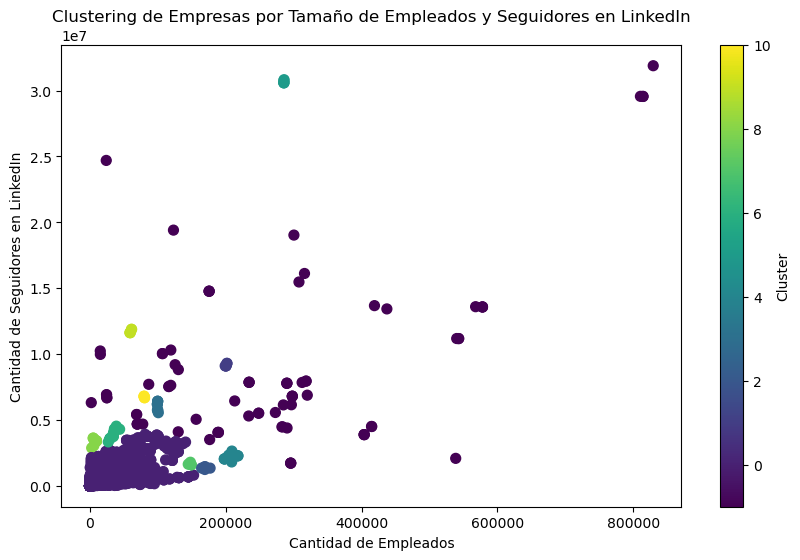

Número de Empresas en Cada Cluster:
 0     12849
-1        81
 6        13
 4        10
 3         9
 8         9
 1         6
 2         5
 5         5
 7         5
 9         5
 10        5
Name: cluster, dtype: int64


In [124]:
# Visualizar los resultados del clustering
plt.figure(figsize=(10, 6))
plt.scatter(X['employee_count'], X['follower_count'], c=dbscan.labels_, cmap='viridis', s=50)
plt.title('Clustering de Empresas por Tamaño de Empleados y Seguidores en LinkedIn')
plt.xlabel('Cantidad de Empleados')
plt.ylabel('Cantidad de Seguidores en LinkedIn')
plt.colorbar(label='Cluster')
plt.show()

# Mostrar el número de empresas en cada cluster
cluster_counts = df_combined['cluster'].value_counts()
print("Número de Empresas en Cada Cluster:")
print(cluster_counts)

Cluster 0: Este es el cluster más grande y contiene 12849 empresas. En DBSCAN, los puntos que no se asignan a ningún cluster se etiquetan como -1. Por lo tanto, las empresas en este cluster están bien agrupadas y son densas según los criterios de distancia especificados por el usuario.
Otros Clusters: Los clusters numerados del 1 al 10 contienen un número más pequeño de empresas, con cantidades que van desde 5 hasta 13. Estos clusters representan grupos más pequeños de empresas que están relativamente más distantes de los puntos densos en el espacio de características.